## Clustering Practice
This uses a shop customer data set obtained from Kaggle by the user "data scientist anna". I do not own any part of the data used in this clustering activity.

Source: https://www.kaggle.com/datasets/datascientistanna/customers-dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Installing Scikit Learn
#!pip install -U scikit-learn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv("Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income ($)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>],
       [<AxesSubplot:title={'center':'Work Experience'}>,
        <AxesSubplot:title={'center':'Family Size'}>]], dtype=object)

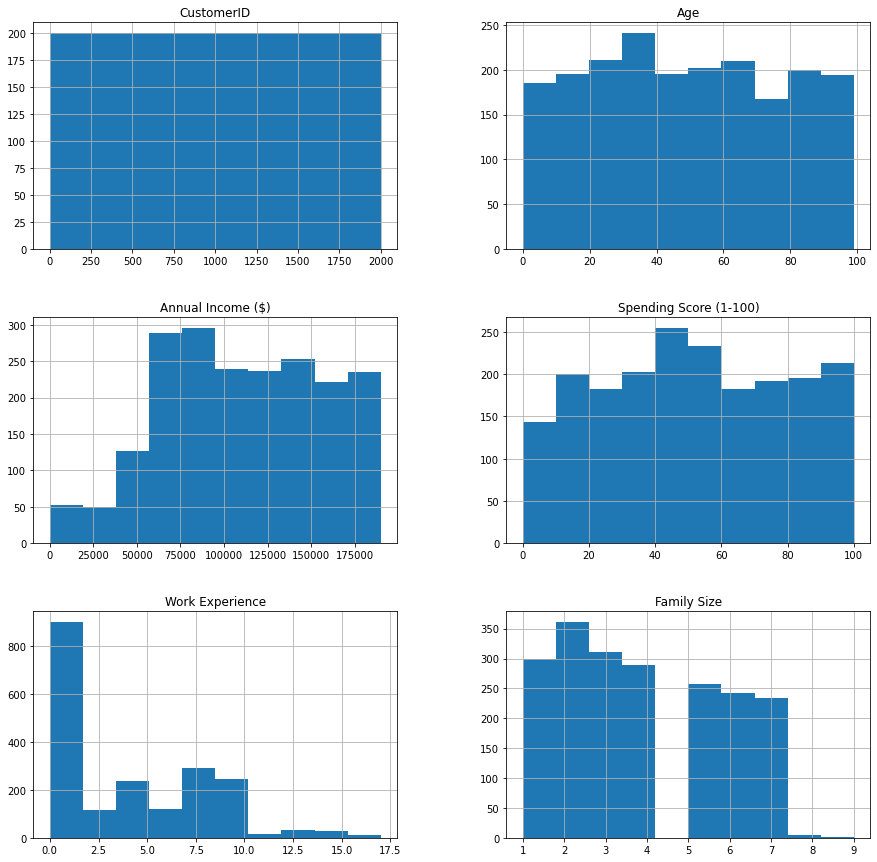

In [23]:
df.hist(figsize = (15,15))

In [29]:
df['Gender2'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender2
0,1,Male,19,15000,39,Healthcare,1,4,1
1,2,Male,21,35000,81,Engineer,3,3,1
2,3,Female,20,86000,6,Engineer,1,1,0
3,4,Female,23,59000,77,Lawyer,0,2,0
4,5,Female,31,38000,40,Entertainment,2,6,0


In [35]:
df2 = df[["Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size", "Gender2"]]
df2.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender2
0,19,15000,39,1,4,1
1,21,35000,81,3,3,1
2,20,86000,6,1,1,0
3,23,59000,77,0,2,0
4,31,38000,40,2,6,0


In [36]:
df2.skew()

Age                       0.049222
Annual Income ($)        -0.116491
Spending Score (1-100)    0.004555
Work Experience           0.683718
Family Size               0.199263
Gender2                   0.378891
dtype: float64

### Scaling values
Since the value of Annual income and spending are vastly different from the others, we need to do scaling

In [38]:
scaler = StandardScaler()
scaler.fit(df2)
scaler.mean_

array([4.89600000e+01, 1.10731822e+05, 5.09625000e+01, 4.10250000e+00,
       3.76850000e+00, 4.07000000e-01])

In [41]:
scaler.var_

array([8.07846400e+02, 2.09105916e+09, 7.79955094e+02, 1.53759937e+01,
       3.88190775e+00, 2.41351000e-01])

In [42]:
df2_scaled_np = scaler.transform(df2)

In [44]:
df2_prepared = pd.DataFrame(df2_scaled_np, columns = df2.columns)

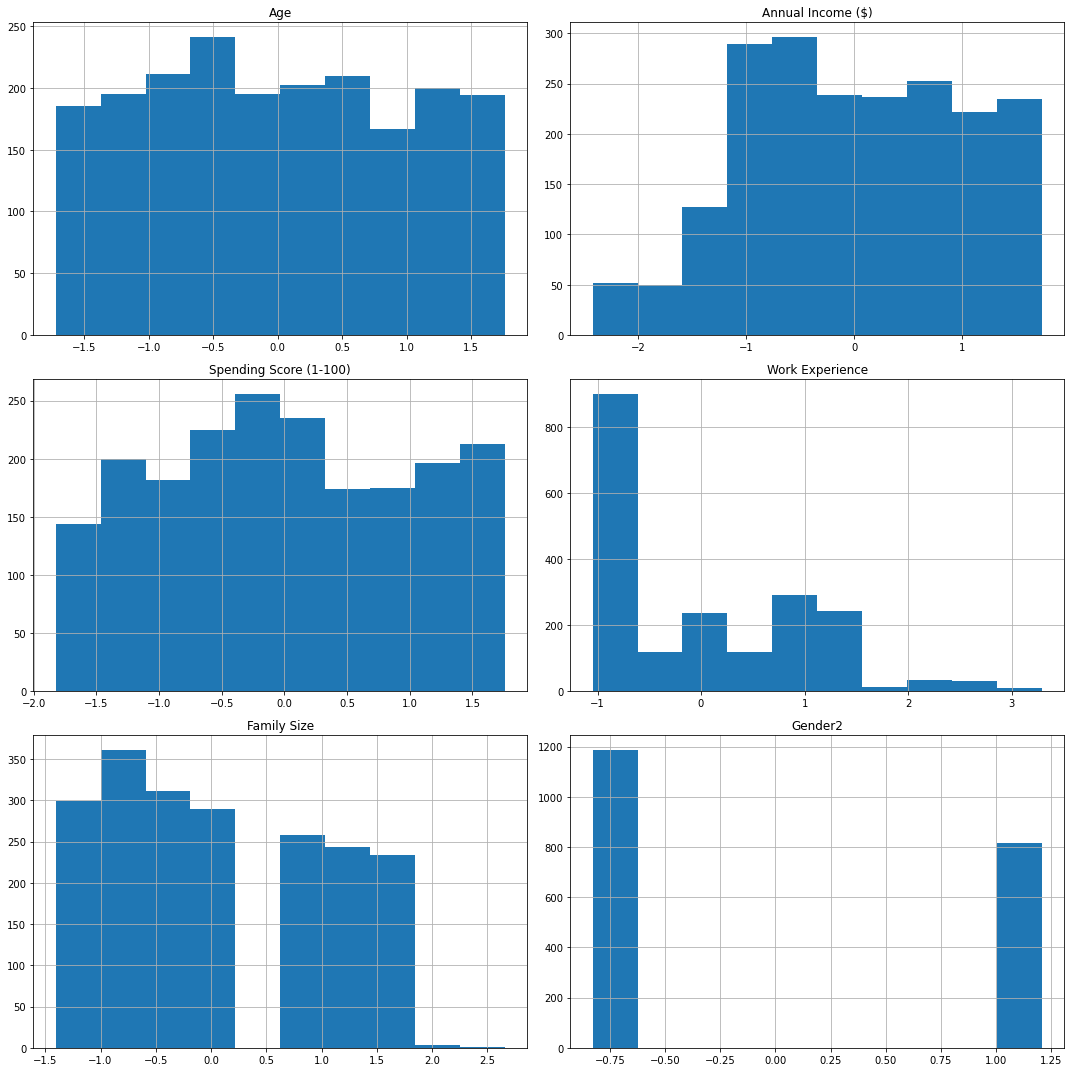

In [45]:
df2_prepared.hist(figsize = (15,15))
plt.tight_layout()
plt.show()

## Using Kmeans

We will be using a range of 1 to 7 to find the suitable k value.

In [46]:
SSE = []
for i in range(1,8):
    model_i = KMeans(n_clusters = i, max_iter=300, tol=0.0001, n_init=10, random_state=99)
    model_i.fit(df2_prepared)
    SSE.append(model_i.inertia_)

SSE

[12000.000000000004,
 9999.034419661682,
 9046.120534811505,
 8358.49513386675,
 7756.577764905734,
 7305.685832796819,
 6920.852271292487]

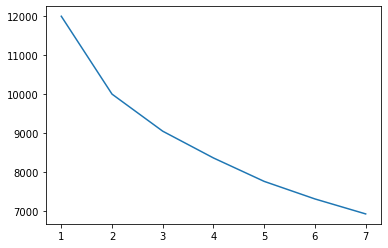

In [47]:
k = (range(1,8))
plt.plot(k, SSE)

K value of 2 would be good enough

### Clustering
We will be running the Kmeans clustering with k = 2

In [92]:
model = KMeans(n_clusters = 4, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model.fit(df2_prepared)

KMeans(n_clusters=4, n_init=10, random_state=99)

In [93]:
# Print the SSE, number of interations run, and the centroids
print("Attributes of the clustering solution for k=2:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

Attributes of the clustering solution for k=2:
SSE : 8358.5
Num of iterations : 15

Cluster centers : [[ 0.09930021  0.27691823  0.08680245  0.07201632  0.88520991 -0.82845678]
 [-0.09732704 -0.27558899 -0.07341278 -0.21107329 -0.79424085 -0.82845678]
 [ 0.04540442 -0.11992366 -0.00196588 -0.70009028  0.05496582  1.20706357]
 [-0.0525137   0.20082729 -0.00839507  1.2135727  -0.11111498  1.05713856]]


In [94]:
between_ss = SSE[0] - model.inertia_
improvement = (between_ss / SSE[0])*100
print('The improvement of SSE due to clustering (k=2) is: ' + str(round(improvement,2)) + '%')

The improvement of SSE due to clustering (k=2) is: 30.35%


In [95]:
df2["cluster"] = model.labels_

# Show all possible "cluster" values, and how often each one occurs
df2['cluster'].value_counts()

C:\Users\ozjbr\AppData\Local\Temp\ipykernel_28900\1710631438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["cluster"] = model.labels_


1    604
0    556
2    488
3    352
Name: cluster, dtype: int64

In [96]:
df2.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender2,cluster
0,19,15000,39,1,4,1,2
1,21,35000,81,3,3,1,2
2,20,86000,6,1,1,0,1
3,23,59000,77,0,2,0,1
4,31,38000,40,2,6,0,0


### Interpreting the cluster

In [97]:
# find the cluster centroids
model.cluster_centers_

array([[ 0.09930021,  0.27691823,  0.08680245,  0.07201632,  0.88520991,
        -0.82845678],
       [-0.09732704, -0.27558899, -0.07341278, -0.21107329, -0.79424085,
        -0.82845678],
       [ 0.04540442, -0.11992366, -0.00196588, -0.70009028,  0.05496582,
         1.20706357],
       [-0.0525137 ,  0.20082729, -0.00839507,  1.2135727 , -0.11111498,
         1.05713856]])

<AxesSubplot:>

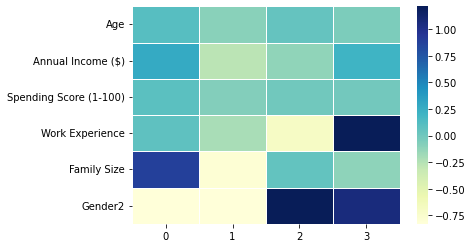

In [98]:
clust_means = pd.DataFrame(model.cluster_centers_, columns=df2_prepared.columns)
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

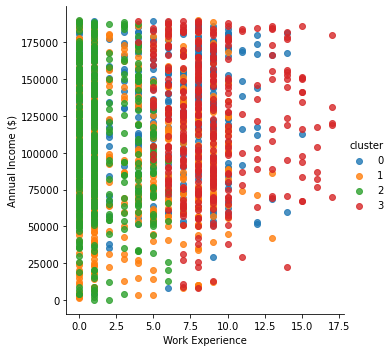

In [99]:
sns.lmplot( x="Work Experience", y="Annual Income ($)", data=df2, fit_reg= False, hue='cluster', legend=True)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income ($)'>

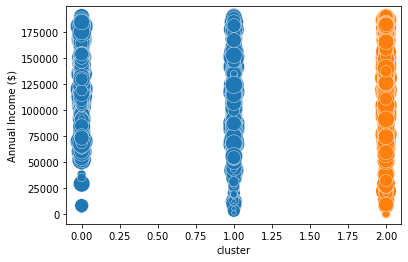

In [91]:
sns.scatterplot(x = 'cluster', y = 'Annual Income ($)', data = df2, size= 'Work Experience', legend = False , sizes = (20, 500), hue ='Gender2')